C:\Users\Boopathi Kumar\AppData\Local\Temp\ipykernel_24972\110468999.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
C:\Users\Boopathi Kumar\AppData\Local\Temp\ipykernel_24972\110468999.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'], errors='coerce')
d:\Codes\Projects\ML\Limi\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
            Model  Accuracy       MSE       MAE
0   Random Forest  0.835336  0.209484  0.179604
1  Neural Network  0.823969  0.217928  0.189997


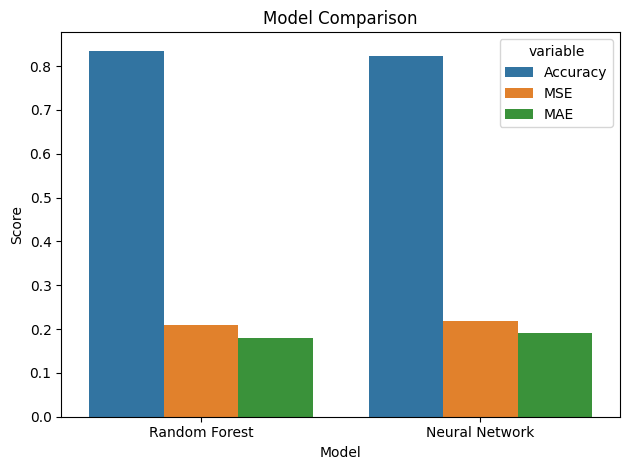

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess data
df = pd.read_csv(r"D:\\Codes\\Projects\\ML\\Limi\data\\RTA Dataset.csv")
df.fillna(method='ffill', inplace=True)
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')
df['Hour'] = df['Time'].dt.hour.fillna(12)

severity_order = ['Slight Injury', 'Serious Injury', 'Fatal injury']
df['Accident_severity'] = pd.Categorical(df['Accident_severity'], categories=severity_order, ordered=True)
le = LabelEncoder()
df['SeverityEncoded'] = le.fit_transform(df['Accident_severity'])

X = df.drop(['Accident_severity', 'SeverityEncoded', 'Time'], axis=1)
X = pd.get_dummies(X, drop_first=True)
y = df['SeverityEncoded']

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# ---------- Random Forest ----------
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

rf_metrics = {
    "Model": "Random Forest",
    "Accuracy": accuracy_score(y_test, rf_pred),
    "MSE": mean_squared_error(y_test, rf_pred),
    "MAE": mean_absolute_error(y_test, rf_pred)
}

# ---------- Neural Network ----------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

nn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes
])
nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

nn.fit(X_train_scaled, y_train, epochs=20, validation_split=0.2, verbose=0)

nn_pred = nn.predict(X_test_scaled).argmax(axis=1)

nn_metrics = {
    "Model": "Neural Network",
    "Accuracy": accuracy_score(y_test, nn_pred),
    "MSE": mean_squared_error(y_test, nn_pred),
    "MAE": mean_absolute_error(y_test, nn_pred)
}

# ---------- Results ----------
results_df = pd.DataFrame([rf_metrics, nn_metrics])
print(results_df)

# ---------- Visualization ----------
sns.barplot(data=results_df.melt(id_vars="Model"), x="Model", y="value", hue="variable")
plt.title("Model Comparison")
plt.ylabel("Score")
plt.tight_layout()
plt.show()
